In [526]:
import meitner
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [527]:
id = 'Au 4f 655'
x = meitner.Pes.from_vamas('au3-0001.pxt.vms', region_id=id, normalize=True, n_peaks=2, dict_keys=['Au'])

Excitation energy:
655.0 eV


In [528]:
x.generate_params(be_guess=[83,87])

name,value,initial value,min,max,vary,expression
data_Au_p0_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p0_center,83.0000000,83,79.0000000,93.0000000,True,
data_Au_p0_sigma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gamma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_sigma
data_Au_p0_lfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_gamma
data_Au_p0_glmix,0.50000000,None,0.00000000,1.00000000,False,data_Au_p0_lfwhm/(data_Au_p0_lfwhm+data_Au_p0_gfwhm)
data_Au_p0_fwhm,3.00000000,None,0.00000000,3.00000000,False,"calc_voigt_fwhm(data_Au_p0_sigma,data_Au_p0_gamma)"
data_Au_p1_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p1_center,87.0000000,87,79.0000000,93.0000000,True,


In [529]:
x.fit_data()

In [531]:
df

,ke,be,cps,bg,cps_no_bg,p0,p1
0,562.0,93.0,0.062374,0.065292,-0.002918,0.000534,0.001094
1,562.1,92.9,0.063712,0.065296,-0.001585,0.000545,0.001130
2,562.2,92.8,0.063853,0.065300,-0.001447,0.000556,0.001169
3,562.3,92.7,0.066095,0.065298,0.000796,0.000568,0.001209
4,562.4,92.6,0.070386,0.065284,0.005102,0.000580,0.001252
...,...,...,...,...,...,...,...
136,575.6,79.4,0.011300,0.011773,-0.000473,0.003741,0.000751
137,575.7,79.3,0.012030,0.011772,0.000257,0.003545,0.000731
138,575.8,79.2,0.011629,0.011773,-0.000143,0.003364,0.000712
139,575.9,79.1,0.011882,0.011773,0.000109,0.003197,0.000693


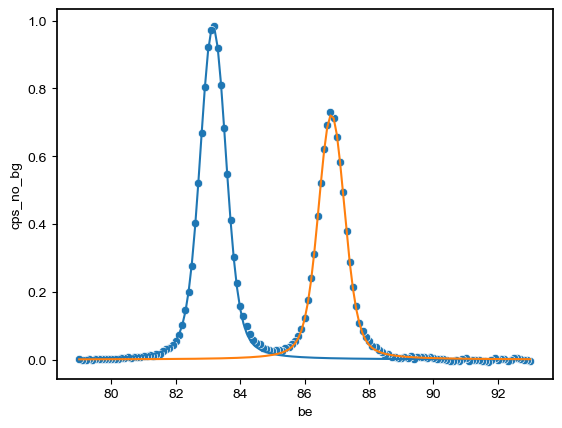

In [535]:
df = x.df_dict['Au']
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='be', y='cps_no_bg', ax=ax)
for p in ['p0', 'p1']:
    sns.lineplot(data=df, x='be', y=p, ax=ax)

In [533]:
max(df['cps'])

1.0113003859635215